In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from preprocessingfunctions import *

In [31]:
train_df = pd.read_excel("FlightPrediction/Data_Train.xlsx")

In [3]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
test_df = pd.read_excel("FlightPrediction/Test_set.xlsx")

In [5]:
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 500.8+ KB


In [7]:
train_df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [8]:
train_df.describe(include='all')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683,10683.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3849,504,4537,4537,2376,233,423,550,5625,8345,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.064121
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.359167
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


In [9]:
train_df.shape

(10683, 11)

In [10]:
train_df.size

117513

In [11]:
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [12]:
train_df.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [13]:
train_df.duplicated().sum()

220

In [32]:
train_df[train_df.duplicated(keep=False)]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
33,Jet Airways,15/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,12:35 16 Jun,22h,2 stops,In-flight meal not included,10919
49,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150
73,Jet Airways,24/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 25 Jun,13h 30m,2 stops,No info,12819
81,Jet Airways,24/03/2019,Banglore,New Delhi,BLR → DEL,19:55,22:35,2h 40m,non-stop,No info,7229
87,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,04:25 07 Jun,18h 45m,2 stops,No info,13014
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


In [15]:
train_df.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [16]:
train_df.Date_of_Journey

0        24/03/2019
1         1/05/2019
2         9/06/2019
3        12/05/2019
4        01/03/2019
            ...    
10678     9/04/2019
10679    27/04/2019
10680    27/04/2019
10681    01/03/2019
10682     9/05/2019
Name: Date_of_Journey, Length: 10683, dtype: object

In [17]:
train_df.Date_of_Journey.unique()

array(['24/03/2019', '1/05/2019', '9/06/2019', '12/05/2019', '01/03/2019',
       '24/06/2019', '12/03/2019', '27/05/2019', '1/06/2019',
       '18/04/2019', '9/05/2019', '24/04/2019', '3/03/2019', '15/04/2019',
       '12/06/2019', '6/03/2019', '21/03/2019', '3/04/2019', '6/05/2019',
       '15/05/2019', '18/06/2019', '15/06/2019', '6/04/2019',
       '18/05/2019', '27/06/2019', '21/05/2019', '06/03/2019',
       '3/06/2019', '15/03/2019', '3/05/2019', '9/03/2019', '6/06/2019',
       '24/05/2019', '09/03/2019', '1/04/2019', '21/04/2019',
       '21/06/2019', '27/03/2019', '18/03/2019', '12/04/2019',
       '9/04/2019', '1/03/2019', '03/03/2019', '27/04/2019'], dtype=object)

In [18]:
train_df.Date_of_Journey.nunique()

44

In [33]:
train_df['Date'] = train_df['Date_of_Journey'].str.split("/").str[0]

In [34]:
train_df['Month'] = train_df['Date_of_Journey'].str.split("/").str[1]

In [35]:
train_df['Year'] = train_df['Date_of_Journey'].str.split("/").str[2]

In [23]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


In [36]:
train_df.drop(['Date_of_Journey'],axis=1,inplace=True)

In [25]:
train_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


In [26]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  Date             10683 non-null  object
 11  Month            10683 non-null  object
 12  Year             10683 non-null  object
dtypes: int64(1), object(12)
memory usage: 584.3+ KB


In [37]:
train_df['Date'] = train_df['Date'].astype(int)
train_df['Month'] = train_df['Month'].astype(int)
train_df['Year'] = train_df['Year'].astype(int)

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  Date             10683 non-null  int32 
 11  Month            10683 non-null  int32 
 12  Year             10683 non-null  int32 
dtypes: int32(3), int64(1), object(9)
memory usage: 584.3+ KB


In [38]:
train_df['Dep_Hours'] = train_df['Dep_Time'].str.split(":").str[0]
train_df['Dep_Mins'] = train_df['Dep_Time'].str.split(":").str[1]

In [35]:
train_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hours,Dep_Mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,05,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,09,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,05
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50


In [39]:
train_df.drop(['Dep_Time'],axis=1,inplace=True)

In [37]:
train_df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hours,Dep_Mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,05,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,09,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,05
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50


In [40]:
train_df['Dep_Hours'] = train_df['Dep_Hours'].astype(int)
train_df['Dep_Mins'] = train_df['Dep_Mins'].astype(int)

In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Arrival_Time     10683 non-null  object
 5   Duration         10683 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10683 non-null  object
 8   Price            10683 non-null  int64 
 9   Date             10683 non-null  int32 
 10  Month            10683 non-null  int32 
 11  Year             10683 non-null  int32 
 12  Dep_Hours        10683 non-null  int32 
 13  Dep_Mins         10683 non-null  int32 
dtypes: int32(5), int64(1), object(8)
memory usage: 626.0+ KB


In [41]:
train_df['Duration_Hours'] = train_df['Duration'].str.split(" ").str[0]
train_df['Duration_Hours'] = train_df['Duration_Hours'].apply(lambda x:x.split('h')[0])
#train_df.drop(['Duration_Mins'],axis=1,inplace=True)

In [15]:
train_df[train_df['Duration_Hours']=='5m']

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hours,Dep_Mins,Duration_Hours
6474,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,16:55,5m,2 stops,No info,17327,6,3,2019,16,50,5m


In [42]:
train_df.drop(6474,axis=0,inplace=True)

In [43]:
train_df['Duration_Hours'] = train_df['Duration_Hours'].astype(int)
train_df.drop(['Duration'],axis=1,inplace=True)

In [39]:
train_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hours,Dep_Mins,Arrival_Hours,Arrival_Mins,Duration_Hours
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25,19
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35,4


In [42]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10681 non-null  object
 4   Total_Stops      10681 non-null  object
 5   Additional_Info  10682 non-null  object
 6   Price            10682 non-null  int64 
 7   Date             10682 non-null  int32 
 8   Month            10682 non-null  int32 
 9   Year             10682 non-null  int32 
 10  Dep_Hours        10682 non-null  int32 
 11  Dep_Mins         10682 non-null  int32 
 12  Arrival_Hours    10682 non-null  int32 
 13  Arrival_Mins     10682 non-null  int32 
 14  Duration_Hours   10682 non-null  int32 
dtypes: int32(8), int64(1), object(6)
memory usage: 751.1+ KB


In [50]:
train_df.Destination.unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [51]:
train_df.Destination.value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [52]:
train_df.Route.unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [44]:
train_df['Arrival_Time'] = train_df['Arrival_Time'].apply(lambda x: x.split(" ")[0]) 

In [45]:
train_df['Arrival_Hours'] = train_df['Arrival_Time'].str.split(":").str[0]
train_df['Arrival_Mins'] = train_df['Arrival_Time'].str.split(":").str[1]

In [46]:
train_df['Arrival_Hours'] = train_df['Arrival_Hours'].astype(int)
train_df['Arrival_Mins'] = train_df['Arrival_Mins'].astype(int)

In [ ]:
train_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hours,Dep_Mins,Arrival_Hours,Arrival_Mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


In [43]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10681 non-null  object
 4   Total_Stops      10681 non-null  object
 5   Additional_Info  10682 non-null  object
 6   Price            10682 non-null  int64 
 7   Date             10682 non-null  int32 
 8   Month            10682 non-null  int32 
 9   Year             10682 non-null  int32 
 10  Dep_Hours        10682 non-null  int32 
 11  Dep_Mins         10682 non-null  int32 
 12  Arrival_Hours    10682 non-null  int32 
 13  Arrival_Mins     10682 non-null  int32 
 14  Duration_Hours   10682 non-null  int32 
dtypes: int32(8), int64(1), object(6)
memory usage: 751.1+ KB


In [44]:
train_df['Total_Stops'].isnull().sum()

1

In [45]:
train_df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1519
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [47]:
train_df['Total_Stops'].mode()[0]

'1 stop'

In [47]:
train_df['Total_Stops'].fillna(train_df['Total_Stops'].mode()[0],inplace=True)

In [48]:
train_df['Total_Stops'].isnull().sum()

0

In [49]:
train_df.head()

,Airline,Source,Destination,Route,Arrival_Time,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hours,Dep_Mins,Duration_Hours,Arrival_Hours,Arrival_Mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10,non-stop,No info,3897,24,3,2019,22,20,2,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,2 stops,No info,7662,1,5,2019,5,50,7,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25,2 stops,No info,13882,9,6,2019,9,25,19,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,1 stop,No info,6218,12,5,2019,18,5,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,1 stop,No info,13302,1,3,2019,16,50,4,21,35


In [54]:
#train_df.drop(['Route'],axis=1,inplace=True)
train_df.drop(['Arrival_Time'],axis=1,inplace=True)

In [55]:
train_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hours,Dep_Mins,Duration_Hours,Arrival_Hours,Arrival_Mins
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,2019,22,20,2,1,10
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,2019,5,50,7,13,15
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,2019,9,25,19,4,25
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,2019,18,5,5,23,30
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,2019,16,50,4,21,35


In [56]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Total_Stops      10682 non-null  object
 4   Additional_Info  10682 non-null  object
 5   Price            10682 non-null  int64 
 6   Date             10682 non-null  int32 
 7   Month            10682 non-null  int32 
 8   Year             10682 non-null  int32 
 9   Dep_Hours        10682 non-null  int32 
 10  Dep_Mins         10682 non-null  int32 
 11  Duration_Hours   10682 non-null  int32 
 12  Arrival_Hours    10682 non-null  int32 
 13  Arrival_Mins     10682 non-null  int32 
dtypes: int32(8), int64(1), object(5)
memory usage: 709.4+ KB


In [57]:
train_df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [59]:
from sklearn.preprocessing import LabelEncoder
labelencoder_airline=LabelEncoder()

In [72]:
labelencoder_source=LabelEncoder()
labelencoder_Destination=LabelEncoder()
labelencoder_Additional_info=LabelEncoder()
labelencoder_total_stops=LabelEncoder()

In [61]:
train_df['Airline'] = labelencoder_airline.fit_transform(train_df['Airline'])

In [65]:
train_df['Airline'].head()

0    3
1    1
2    4
3    3
4    3
Name: Airline, dtype: int32

In [67]:
labelencoder_airline.fit_transform(train_df['Airline'])

array([ 3,  1,  4, ...,  4, 10,  1], dtype=int32)

In [75]:
train_df['Source'] = labelencoder_source.fit_transform(train_df['Source'])
train_df['Destination'] = labelencoder_Destination.fit_transform(train_df['Destination'])
train_df['Additional_Info'] = labelencoder_Additional_info.fit_transform(train_df['Additional_Info'])
train_df['Total_Stops'] = labelencoder_total_stops.fit_transform(train_df['Total_Stops'])

In [76]:
train_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hours,Dep_Mins,Duration_Hours,Arrival_Hours,Arrival_Mins
0,3,0,5,4,8,3897,24,3,2019,22,20,2,1,10
1,1,3,0,1,8,7662,1,5,2019,5,50,7,13,15
2,4,2,1,1,8,13882,9,6,2019,9,25,19,4,25
3,3,3,0,0,8,6218,12,5,2019,18,5,5,23,30
4,3,0,5,0,8,13302,1,3,2019,16,50,4,21,35


In [77]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Airline          10682 non-null  int32
 1   Source           10682 non-null  int32
 2   Destination      10682 non-null  int32
 3   Total_Stops      10682 non-null  int32
 4   Additional_Info  10682 non-null  int32
 5   Price            10682 non-null  int64
 6   Date             10682 non-null  int32
 7   Month            10682 non-null  int32
 8   Year             10682 non-null  int32
 9   Dep_Hours        10682 non-null  int32
 10  Dep_Mins         10682 non-null  int32
 11  Duration_Hours   10682 non-null  int32
 12  Arrival_Hours    10682 non-null  int32
 13  Arrival_Mins     10682 non-null  int32
dtypes: int32(13), int64(1)
memory usage: 709.4 KB


In [83]:
train_df['Dep_Hours'].mean()

12.490357610934282

In [84]:
train_df['Dep_Hours'].std()

5.748818946566094

In [85]:
upperlimit = train_df['Dep_Hours'].mean()+3*train_df['Dep_Hours'].std()
lowerlimit = train_df['Dep_Hours'].mean()-3*train_df['Dep_Hours'].std()

In [86]:
upperlimit

29.736814450632565

In [87]:
lowerlimit

-4.7560992287640005

In [89]:
train_df['Dep_Hours']<upperlimit

0        True
1        True
2        True
3        True
4        True
         ... 
10678    True
10679    True
10680    True
10681    True
10682    True
Name: Dep_Hours, Length: 10682, dtype: bool

In [90]:
upperlimit = train_df['Price'].mean()+3*train_df['Price'].std()
lowerlimit = train_df['Price'].mean()-3*train_df['Price'].std()

In [91]:
train_df[train_df['Price']<upperlimit]

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hours,Dep_Mins,Duration_Hours,Arrival_Hours,Arrival_Mins
0,3,0,5,4,8,3897,24,3,2019,22,20,2,1,10
1,1,3,0,1,8,7662,1,5,2019,5,50,7,13,15
2,4,2,1,1,8,13882,9,6,2019,9,25,19,4,25
3,3,3,0,0,8,6218,12,5,2019,18,5,5,23,30
4,3,0,5,0,8,13302,1,3,2019,16,50,4,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,4,8,4107,9,4,2019,19,55,2,22,25
10679,1,3,0,4,8,4145,27,4,2019,20,45,2,23,20
10680,4,0,2,4,8,7229,27,4,2019,8,20,3,11,20
10681,10,0,5,4,8,12648,1,3,2019,11,30,2,14,10


In [92]:
train_df.shape

(10682, 14)

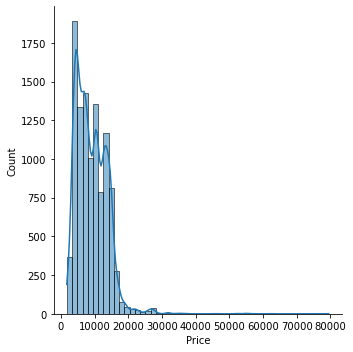

In [97]:
sns.displot(train_df['Price'],bins=50,kde=True)

In [99]:
train_df['Price'].max()

79512

In [101]:
train_df['Price'].min()

1759

c:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

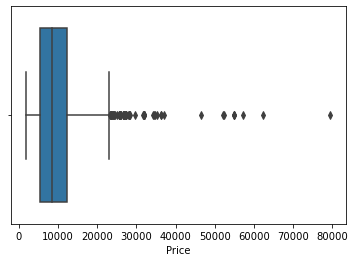

In [100]:
sns.boxplot('Price',data=train_df)

In [102]:
train_df[train_df['Price']>upperlimit]

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hours,Dep_Mins,Duration_Hours,Arrival_Hours,Arrival_Mins
123,1,2,1,0,8,27430,1,3,2019,23,0,20,19,15
396,6,2,1,0,8,36983,1,3,2019,12,50,6,19,15
486,4,0,5,0,8,26890,1,3,2019,8,55,6,15,15
510,4,0,5,0,8,26890,1,3,2019,7,0,5,12,25
597,1,4,3,1,8,25139,6,3,2019,9,40,29,15,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10353,4,4,3,1,8,24210,6,3,2019,19,50,21,16,50
10364,5,0,5,0,3,57209,1,3,2019,9,45,4,14,25
10383,4,0,5,0,8,26890,1,3,2019,7,0,22,5,5
10439,4,0,5,0,8,31825,1,3,2019,18,40,14,9,0


In [107]:
upplimit = train_df['Price'].quantile(0.95)
lowlimit = train_df['Price'].quantile(0.05)

In [109]:
train_df[train_df['Price']>upplimit]

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hours,Dep_Mins,Duration_Hours,Arrival_Hours,Arrival_Mins
7,4,0,5,0,8,22270,1,3,2019,8,0,21,5,5
20,2,2,1,0,8,19495,6,3,2019,14,10,5,19,20
38,4,0,5,0,8,19225,6,3,2019,7,0,6,13,15
56,1,0,5,1,8,17345,1,3,2019,8,50,15,23,55
91,6,2,1,0,8,17057,6,3,2019,2,15,11,13,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10580,4,0,5,0,8,17261,6,3,2019,14,5,19,9,30
10625,4,2,1,1,5,19644,9,5,2019,11,40,7,19,0
10645,6,2,1,0,8,17057,3,3,2019,7,5,8,15,30
10668,4,2,1,1,8,21219,9,5,2019,11,40,7,19,0


In [110]:
upperlimit = train_df['Price'].mean()+3*train_df['Price'].std()
lowerlimit = train_df['Price'].mean()-3*train_df['Price'].std()

In [113]:
train_df.loc[train_df['Price']>upperlimit,'Price'] = upperlimit

c:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

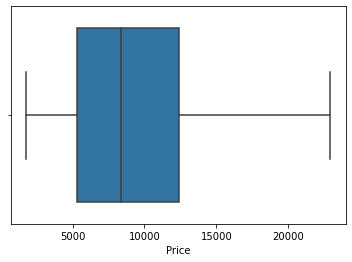

In [114]:
sns.boxplot('Price',data=train_df)

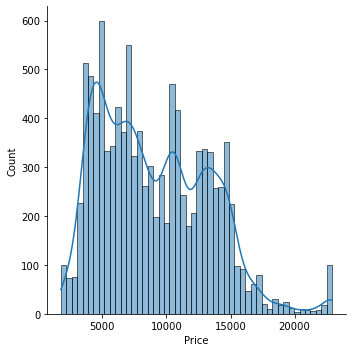

In [117]:
sns.displot(train_df['Price'],bins=50,kde=True)

In [118]:
train_df['Price'].max()

22918.94982142857

In [119]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [123]:
df = sc.fit_transform(train_df)

In [124]:
df

array([[-0.41080484, -1.65843519,  2.41677843, ..., -0.97083112,
        -1.80031946, -0.88998423],
       [-1.26115217,  0.89029942, -0.97373235, ..., -0.38223823,
        -0.05081299, -0.58701691],
       [ 0.01436882,  0.04072122, -0.29563019, ...,  1.03038468,
        -1.36294284,  0.01891773],
       ...,
       [ 0.01436882, -1.65843519,  0.38247196, ..., -0.85311254,
        -0.3423974 , -0.28404959],
       [ 2.56541078, -1.65843519,  2.41677843, ..., -0.97083112,
         0.09497921, -0.88998423],
       [-1.26115217,  0.04072122, -0.29563019, ..., -0.26451966,
         0.82394024, -0.58701691]])

In [126]:
pd.DataFrame(df,columns=train_df.columns)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hours,Dep_Mins,Duration_Hours,Arrival_Hours,Arrival_Mins
0,-0.410805,-1.658435,2.416778,1.407223,0.499921,-1.203553,1.237288,-1.467707,0.0,1.654268,-0.234932,-0.970831,-1.800319,-0.889984
1,-1.261152,0.890299,-0.973732,-0.253644,0.499921,-0.319079,-1.475307,0.250153,0.0,-1.303000,1.363674,-0.382238,-0.050813,-0.587017
2,0.014369,0.040721,-0.295630,-0.253644,0.499921,1.142123,-0.531796,1.109082,0.0,-0.607172,0.031502,1.030385,-1.362943,0.018918
3,-0.410805,0.890299,-0.973732,-0.807267,0.499921,-0.658304,-0.177979,0.250153,0.0,0.958440,-1.034235,-0.617675,1.407109,0.321885
4,-0.410805,-1.658435,2.416778,-0.807267,0.499921,1.005869,-1.475307,-1.467707,0.0,0.610527,1.363674,-0.735394,1.115525,0.624852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,-1.686326,0.890299,-0.973732,1.407223,0.499921,-1.154220,-0.531796,-0.608777,0.0,1.132397,1.630108,-0.970831,1.261317,0.018918
10678,-1.261152,0.890299,-0.973732,1.407223,0.499921,-1.145293,1.591104,-0.608777,0.0,1.306354,1.097240,-0.970831,1.407109,-0.284050
10679,0.014369,-1.658435,0.382472,1.407223,0.499921,-0.420800,1.591104,-0.608777,0.0,-0.781129,-0.234932,-0.853113,-0.342397,-0.284050
10680,2.565411,-1.658435,2.416778,1.407223,0.499921,0.852232,-1.475307,-1.467707,0.0,-0.259258,0.297937,-0.970831,0.094979,-0.889984
